# Імпорт модулів

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Зчитуємо таблиці і шукаєио необхідну

In [7]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'  
table = pd.read_html(url, match="Коефіцієнт народжуваності [у|в] регіонах України .*")

In [8]:
df = pd.DataFrame(table[0])

# 1. Вивести перші рядки таблиці за допомогою методу head

In [9]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


# 2. Визначте кількість рядків та стовпців у датафреймі

In [10]:
num_rows, num_columns = df.shape

print(f"Кількість рядків: {num_rows}")
print(f"Кількість стовбців: {num_columns}")

Кількість рядків: 28
Кількість стовбців: 9


# 3. Замініть у таблиці значення "—" на значення NaN

In [11]:
df.replace("—", np.nan, inplace=True)

# 4. Визначте типи всіх стовпців за допомогою `dataframe.dtypes`

In [12]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

# 5. Замініть типи нечислових колонок на числові.

In [56]:
df['2014'] = df['2014'].astype(int)
df['2019'] = df['2019'].astype(int)
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014        int32
2019        int32
dtype: object

# 6. Порахуйте, яка частка пропусків міститься в кожній колонці

In [72]:
(df.isnull().sum() / len(df)) * 100

Регіон    0.0
1950      0.0
1960      0.0
1970      0.0
1990      0.0
2000      0.0
2012      0.0
2014      0.0
2019      0.0
dtype: float64

# 7. Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [59]:
df.drop(df.index[-1], inplace=True)
df.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
21,Хмельницька,234.00,198.0,148.0,129,85,113,112,79
22,Черкаська,205.00,179.0,144.0,123,75,100,98,64
23,Чернівецька,247.00,218.0,170.0,148,101,128,129,92
24,Чернігівська,220.00,183.0,127.0,108,69,94,90,61
25,Київ,231.04,174.0,159.0,120,73,120,121,110


# 8. Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [64]:
df.drop('Регіон', axis=1).mean(numeric_only=True).round(0)

1950    231.0
1960    208.0
1970    156.0
1990    131.0
2000     83.0
2012    116.0
2014    113.0
2019     89.0
dtype: float64

In [73]:
df.fillna(_, inplace=True)

# 9. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [74]:
YEAR = '2019'
COL_NAME = 'Регіон'
condition = df[YEAR] > df.mean(numeric_only=True)[YEAR]
df[condition][COL_NAME].tolist()

['Крим',
 'Волинська',
 'Донецька',
 'Закарпатська',
 'Луганська',
 'Рівненська',
 'Чернівецька',
 'Київ']

# 10. У якому регіоні була найвища народжуваність у 2014 році?

In [70]:
df.loc[df[YEAR].idxmax(), COL_NAME]

'Крим'

# 11. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

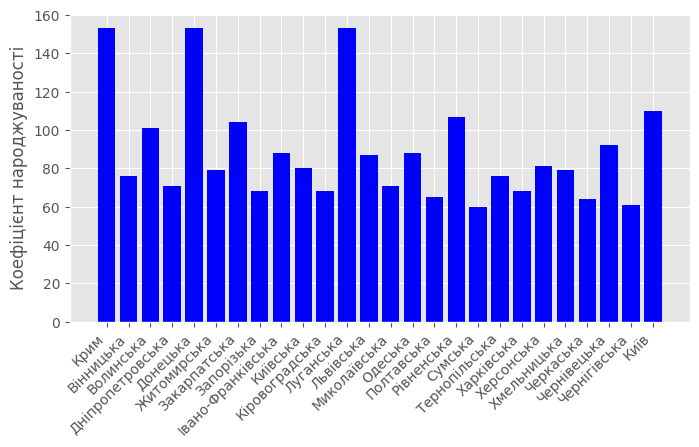

In [71]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 4)) 
plt.bar(df[COL_NAME], df[YEAR], color='b')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Коефіцієнт народжуваності')
plt.show()